# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 13

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 &mdash; 70 баллов
* Задача 2 &mdash; 30 баллов






-----

In [ ]:
# Bot check

# HW_ID: phds_hw13
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [26]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from statsmodels.stats.proportion import proportion_confint
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels.datasets as smd
import statsmodels.api as sm

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge

sns.set(palette='Set2', style='whitegrid', font_scale=1.3)

pd.options.mode.chained_assignment = None


import networkx as nx
from dowhy import gcm

from dowhy import CausalModel
import dowhy.datasets

import networkx as nx
from IPython.display import Image, display

options = {
    "font_size": 14,
    "node_size": 1500,
    "node_color": "#99FF99",
    "edge_color": "#9999FF",
    "arrowsize": 25,
    "width": 3,
}

def draw_graph(graphs, options):
    nx.draw_networkx(graphs, **options)
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")

sns.set(style='whitegrid', palette='Set2')

# Causal Inference + DoWhy





### Задача 1.

**1.** Рассмотрим данные по заболеваемости и смертности от COVID-19 в марте 2020 года когда пандемия только начиналась. В данных представлена информация по нескольким странам по разным возрастным категориям.

Считайте данные и посчитайте Case Fatality Rate (CFR) &mdash; процент смертности при условии подтвержденного коронавируса

In [2]:
data = pd.read_excel('covid_data.xlsx')

In [3]:
data

,Unnamed: 0,Country,Age group,Confirmed cases,Confirmed fatalities
0,0,Italy,0-9,43,0
1,1,Italy,10-19,85,0
2,2,Italy,20-29,296,0
3,3,Italy,30-39,470,0
4,4,Italy,40-49,891,1
...,...,...,...,...,...
103,103,South Korea,40-49,1481,3
104,104,South Korea,50-59,1987,15
105,105,South Korea,60-69,1375,39
106,106,South Korea,70-79,719,78


In [4]:
CFR = data['Confirmed fatalities'].sum()/data['Confirmed cases'].sum()
CFR

0.06973765634669117

Будем рассматривать Китай и Италию как довольно разные страны, в которых коронавирус в начале 2020 развивался наиболее стремительно.

Постройте гистограмму для сравнения CFR двух стран по возрастным категориям. Используйте для этого один вызов `seaborn.barplot` с некоторыми параметрами.

In [16]:
china = data[data['Country'] == 'China']
italy = data[data['Country'] == 'Italy']
china.columns

Index(['Unnamed: 0', 'Country', 'Age group', 'Confirmed cases',
       'Confirmed fatalities'],
      dtype='object')

In [20]:
sns.barplot(data, columns="Age group", values="Confirmed fatalities")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Теперь посчитайте общую CFR на основе суммарного количества случаев по всем категориями и сравните их для этих двух стран.

Что можно наблюдать?

...

**2.** Итак, мы исследуем три признака: страна, возрастная категория, CFR. Определите на них граф причинно-следственных связей на основе логических соображений и визуализируйте его.

Для каждой вершины опишите характер причинно-следственной связи. Например, если это линейная регрессия, то надо выписать ее формулу.

**3.** Сделаем две копии признака "страна":
* `demography` ($D$) &mdash; демографическая ситуация, определяемая страной;
* `treatment methods` ($T$) &mdash; методы лечения, свойственные стране.

Мы делаем такое разделение потому как, например, одна страна может взять методы лечения другой страны, но демографическую ситуацию поменять при этом не получится.

Получается следующий причинно-следственный граф. Визуализируйте его

In [ ]:
causal_graph = nx.DiGraph([
    ('demography', 'Age group'),
    ('treatment methods', 'CFR'),
    ('Age group', 'CFR')
])

Определите по графу causal модель и обучите ее

С помощью интервенции оцените, было бы эффективнее применять в Китае с его демографической ситуацией итальянские методы лечения. Для этого нужно оценить величину
$$NDE = \mathsf{E}(CFR\ |\ D:=China, T:=Italy) - \mathsf{E}(CFR\ |\ D:=China, T:=China),$$
где NDE &mdash; Natural Direct Effect. Используйте достаточно большое количество семплирований.

Теперь, наоборот, оцените, было бы эффективнее применять в Италии с его демографической ситуацией китайские методы лечения.

Наконец, оценим, что было бы если в Китае с его методами лечения демографическая ситуация была бы такой же, как в Италии (Natural Indirect Effect). Какую величину при этом надо посчитать? Посчитайте ее.

Сделайте выводы.

**4.** Наконец, сравните между собой некоторые другие страны. Каким странам вы рекомендовали бы поменять методы лечения на начальном этапе?

---
### Задача 2.

Загрузите <a href="https://github.com/robjellis/lalonde">данные</a> об исследовании влияния эффективности программы профессиональной переподготовки по отношению к реальному заработку человека через пару лет после завершения программы (в 1978). Данные также содержат несколько демографических показателей &mdash; возраст, раса, академическое образование и предыдущий заработок.


- `treat` были ли пройдена программа (1 = тестовая группа, 0 = контроль).
- `age` возраст.
- `educ` количество лет обучения.
- `black` обозначение расы (1 = афроамериканец, 0 = нет).
- `hispan` латиноамериканского происхождения (1 = да, 0 = нет).
- `married` семейное положение (1 = женат/замужем, 0 = неженат/незамужем).
- `nodegree` есть ли высшее образование (1 = да, 0 = нет).
- `re74` доход в 1974 году в долларах США.
- `re75` доход в 1975 году в долларах США.
- `re78` доход в 1978 году в долларах США.

In [21]:
data = pd.read_csv('https://raw.githubusercontent.com/robjellis/lalonde/master/lalonde_data.csv', index_col=0)
data.head()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
ID,,,,,,,,,,
NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


In [22]:
data.describe()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.301303,27.363192,10.268730,0.395765,0.117264,0.415309,0.630293,4557.546569,2184.938207,6792.834483
std,0.459198,9.881187,2.628325,0.489413,0.321997,0.493177,0.483119,6477.964479,3295.679043,7470.730792
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,238.283425
50%,0.000000,25.000000,11.000000,0.000000,0.000000,0.000000,1.000000,1042.330000,601.548400,4759.018500
75%,1.000000,32.000000,12.000000,1.000000,0.000000,1.000000,1.000000,7888.498250,3248.987500,10893.592500
max,1.000000,55.000000,18.000000,1.000000,1.000000,1.000000,1.000000,35040.070000,25142.240000,60307.930000


Постройте оценки propensity score с помощью библиотеки DoWhy.

In [23]:
data.columns

Index(['treat', 'age', 'educ', 'black', 'hispan', 'married', 'nodegree',
       're74', 're75', 're78'],
      dtype='object')

In [24]:
T = 'treat'  # переменная treatment
Y = 're78'  # целевая переменная
X = ['age', 'educ', 'black', 'hispan', 'married', 'nodegree']  # список кофаундереов

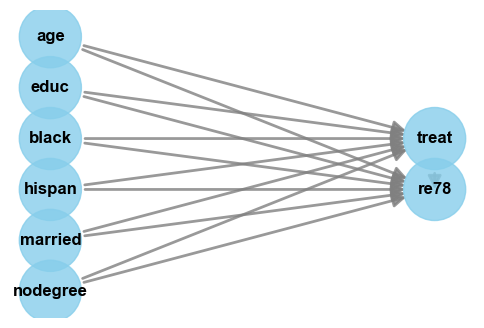

In [27]:
model = CausalModel(
    data=data.astype(int),
    treatment=T,
    outcome=Y,
    common_causes=X
)

model.view_model(file_name="causal_model", size=(6, 4))

In [28]:
identified_estimand = model.identify_effect()
print(identified_estimand)
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.propensity_score_weighting",
)

print(estimate)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                    
────────(E[re78|educ,black,nodegree,hispan,age,married])
d[treat]                                                
Estimand assumption 1, Unconfoundedness: If U→{treat} and U→re78 then P(re78|treat,educ,black,nodegree,hispan,age,married,U) = P(re78|treat,educ,black,nodegree,hispan,age,married)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                    
────────(E[re78|educ,black,nodegree,hispan,age,married])
d[treat]                                                
Estimand assumption 1, Unconfoundedness: If U→{treat} and U→re78 then P(re78|t

In [29]:
estimate.value

In [30]:
estimate.get_confidence_intervals()

In [31]:
estimate.test_stat_significance()

{'p_value': 0.402}

In [32]:
estimate.realized_estimand_expr

'b: re78~treat+educ+black+nodegree+hispan+age+married'

Выводы:

Есть явный положительный эффект от прохождения курсов